# Task 1: Introduction

---

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

![Regression](images/regression.png)

Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. This includes TensorFlow and some utility functions that I've written to save time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

C:\Users\divyanshrastogi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\divyanshrastogi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\divyanshrastogi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\divyanshrastogi\anaconda3\lib\site-packages\tensorflow\python\frame

Libraries imported.


# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [2]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [3]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.

In [4]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [5]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [6]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [7]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [8]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.

In [10]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

Train on 4750 samples, validate on 250 samples
Epoch 1/1000
4750/4750 [==============================] - 1s 155us/sample - loss: 1.1640 - val_loss: 1.0275
Epoch 2/1000
4750/4750 [==============================] - 1s 116us/sample - loss: 1.1599 - val_loss: 1.0237
Epoch 3/1000
4750/4750 [==============================] - 0s 99us/sample - loss: 1.1558 - val_loss: 1.0198
Epoch 4/1000
4750/4750 [==============================] - 0s 97us/sample - loss: 1.1515 - val_loss: 1.0159
Epoch 5/1000
4750/4750 [==============================] - 0s 98us/sample - loss: 1.1472 - val_loss: 1.0120
Epoch 6/1000
4750/4750 [==============================] - 0s 96us/sample - loss: 1.1429 - val_loss: 1.0080
Epoch 7/1000
4750/4750 [==============================] - 0s 97us/sample - loss: 1.1386 - val_loss: 1.0040
Epoch 8/1000
4750/4750 [==============================] - 0s 99us/sample - loss: 1.1343 - val_loss: 1.0000
Epoch 9/1000
4750/4750 [==============================] - 0s 97us/sample - loss: 1.1299 - val_l

Epoch 76/1000
4750/4750 [==============================] - 1s 120us/sample - loss: 0.8949 - val_loss: 0.7818
Epoch 77/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.8921 - val_loss: 0.7793
Epoch 78/1000
4750/4750 [==============================] - 0s 59us/sample - loss: 0.8894 - val_loss: 0.7768
Epoch 79/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.8866 - val_loss: 0.7744
Epoch 80/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.8839 - val_loss: 0.7720
Epoch 81/1000
4750/4750 [==============================] - 0s 63us/sample - loss: 0.8812 - val_loss: 0.7696
Epoch 82/1000
4750/4750 [==============================] - 0s 63us/sample - loss: 0.8785 - val_loss: 0.7673
Epoch 83/1000
4750/4750 [==============================] - 0s 62us/sample - loss: 0.8759 - val_loss: 0.7649
Epoch 84/1000
4750/4750 [==============================] - 0s 63us/sample - loss: 0.8732 - val_loss: 0.7626
Epoch 85/1000
4750/4750 [==

Epoch 151/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 0.7302 - val_loss: 0.6372
Epoch 152/1000
4750/4750 [==============================] - 1s 116us/sample - loss: 0.7285 - val_loss: 0.6357
Epoch 153/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 0.7267 - val_loss: 0.6341
Epoch 154/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 0.7249 - val_loss: 0.6324
Epoch 155/1000
4750/4750 [==============================] - 1s 115us/sample - loss: 0.7232 - val_loss: 0.6308
Epoch 156/1000
4750/4750 [==============================] - 1s 116us/sample - loss: 0.7214 - val_loss: 0.6292
Epoch 157/1000
4750/4750 [==============================] - 1s 115us/sample - loss: 0.7196 - val_loss: 0.6276
Epoch 158/1000
4750/4750 [==============================] - 1s 120us/sample - loss: 0.7179 - val_loss: 0.6260
Epoch 159/1000
4750/4750 [==============================] - 1s 114us/sample - loss: 0.7161 - val_loss: 0.6244
Epoch 160/

4750/4750 [==============================] - 1s 112us/sample - loss: 0.6093 - val_loss: 0.5318
Epoch 226/1000
4750/4750 [==============================] - 0s 102us/sample - loss: 0.6078 - val_loss: 0.5305
Epoch 227/1000
4750/4750 [==============================] - 0s 100us/sample - loss: 0.6062 - val_loss: 0.5292
Epoch 228/1000
4750/4750 [==============================] - 1s 109us/sample - loss: 0.6047 - val_loss: 0.5279
Epoch 229/1000
4750/4750 [==============================] - 0s 102us/sample - loss: 0.6032 - val_loss: 0.5266
Epoch 230/1000
4750/4750 [==============================] - 0s 103us/sample - loss: 0.6016 - val_loss: 0.5253
Epoch 231/1000
4750/4750 [==============================] - 1s 106us/sample - loss: 0.6002 - val_loss: 0.5240
Epoch 232/1000
4750/4750 [==============================] - 1s 116us/sample - loss: 0.5987 - val_loss: 0.5227
Epoch 233/1000
4750/4750 [==============================] - 1s 117us/sample - loss: 0.5972 - val_loss: 0.5215
Epoch 234/1000
4750/4750 

4750/4750 [==============================] - 1s 130us/sample - loss: 0.5095 - val_loss: 0.4476
Epoch 300/1000
4750/4750 [==============================] - 1s 122us/sample - loss: 0.5083 - val_loss: 0.4466
Epoch 301/1000
4750/4750 [==============================] - 1s 110us/sample - loss: 0.5071 - val_loss: 0.4456
Epoch 302/1000
4750/4750 [==============================] - 0s 97us/sample - loss: 0.5059 - val_loss: 0.4445
Epoch 303/1000
4750/4750 [==============================] - 1s 123us/sample - loss: 0.5047 - val_loss: 0.4435
Epoch 304/1000
4750/4750 [==============================] - 1s 116us/sample - loss: 0.5036 - val_loss: 0.4425
Epoch 305/1000
4750/4750 [==============================] - 0s 97us/sample - loss: 0.5024 - val_loss: 0.4415
Epoch 306/1000
4750/4750 [==============================] - 1s 112us/sample - loss: 0.5012 - val_loss: 0.4405
Epoch 307/1000
4750/4750 [==============================] - 0s 101us/sample - loss: 0.5000 - val_loss: 0.4396
Epoch 308/1000
4750/4750 [=

Epoch 374/1000
4750/4750 [==============================] - 0s 86us/sample - loss: 0.4328 - val_loss: 0.3832
Epoch 375/1000
4750/4750 [==============================] - 0s 78us/sample - loss: 0.4320 - val_loss: 0.3825
Epoch 376/1000
4750/4750 [==============================] - 0s 77us/sample - loss: 0.4311 - val_loss: 0.3818
Epoch 377/1000
4750/4750 [==============================] - 0s 74us/sample - loss: 0.4303 - val_loss: 0.3811
Epoch 378/1000
4750/4750 [==============================] - 0s 72us/sample - loss: 0.4294 - val_loss: 0.3804
Epoch 379/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4286 - val_loss: 0.3797
Epoch 380/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.4278 - val_loss: 0.3790
Epoch 381/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4269 - val_loss: 0.3783
Epoch 382/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.4261 - val_loss: 0.3776
Epoch 383/1000
4750

Epoch 449/1000
4750/4750 [==============================] - 0s 56us/sample - loss: 0.3783 - val_loss: 0.3376
Epoch 450/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3777 - val_loss: 0.3371
Epoch 451/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3771 - val_loss: 0.3366
Epoch 452/1000
4750/4750 [==============================] - 0s 55us/sample - loss: 0.3764 - val_loss: 0.3361
Epoch 453/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3758 - val_loss: 0.3356
Epoch 454/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3752 - val_loss: 0.3351
Epoch 455/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3746 - val_loss: 0.3346
Epoch 456/1000
4750/4750 [==============================] - 0s 58us/sample - loss: 0.3740 - val_loss: 0.3341
Epoch 457/1000
4750/4750 [==============================] - 0s 56us/sample - loss: 0.3735 - val_loss: 0.3336
Epoch 458/1000
4750

4750/4750 [==============================] - 0s 80us/sample - loss: 0.3388 - val_loss: 0.3046
Epoch 525/1000
4750/4750 [==============================] - 0s 72us/sample - loss: 0.3383 - val_loss: 0.3043
Epoch 526/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3379 - val_loss: 0.3039
Epoch 527/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3374 - val_loss: 0.3035
Epoch 528/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3370 - val_loss: 0.3031
Epoch 529/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.3365 - val_loss: 0.3027
Epoch 530/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3361 - val_loss: 0.3023
Epoch 531/1000
4750/4750 [==============================] - 0s 70us/sample - loss: 0.3357 - val_loss: 0.3020
Epoch 532/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.3352 - val_loss: 0.3016
Epoch 533/1000
4750/4750 [========

4750/4750 [==============================] - 0s 67us/sample - loss: 0.3085 - val_loss: 0.2781
Epoch 600/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.3082 - val_loss: 0.2778
Epoch 601/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3078 - val_loss: 0.2775
Epoch 602/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3075 - val_loss: 0.2772
Epoch 603/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3071 - val_loss: 0.2769
Epoch 604/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.3068 - val_loss: 0.2766
Epoch 605/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.3064 - val_loss: 0.2763
Epoch 606/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.3061 - val_loss: 0.2760
Epoch 607/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.3057 - val_loss: 0.2757
Epoch 608/1000
4750/4750 [========

4750/4750 [==============================] - 0s 58us/sample - loss: 0.2845 - val_loss: 0.2566
Epoch 675/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2843 - val_loss: 0.2563
Epoch 676/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2840 - val_loss: 0.2561
Epoch 677/1000
4750/4750 [==============================] - 0s 59us/sample - loss: 0.2837 - val_loss: 0.2558
Epoch 678/1000
4750/4750 [==============================] - 0s 58us/sample - loss: 0.2834 - val_loss: 0.2555
Epoch 679/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2831 - val_loss: 0.2553
Epoch 680/1000
4750/4750 [==============================] - 0s 56us/sample - loss: 0.2828 - val_loss: 0.2550
Epoch 681/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2825 - val_loss: 0.2548
Epoch 682/1000
4750/4750 [==============================] - 0s 59us/sample - loss: 0.2823 - val_loss: 0.2545
Epoch 683/1000
4750/4750 [========

4750/4750 [==============================] - 0s 68us/sample - loss: 0.2653 - val_loss: 0.2393
Epoch 750/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2651 - val_loss: 0.2391
Epoch 751/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.2649 - val_loss: 0.2389
Epoch 752/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2646 - val_loss: 0.2387
Epoch 753/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2644 - val_loss: 0.2385
Epoch 754/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2642 - val_loss: 0.2383
Epoch 755/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2640 - val_loss: 0.2381
Epoch 756/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2637 - val_loss: 0.2379
Epoch 757/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2635 - val_loss: 0.2377
Epoch 758/1000
4750/4750 [========

4750/4750 [==============================] - 0s 82us/sample - loss: 0.2500 - val_loss: 0.2251
Epoch 825/1000
4750/4750 [==============================] - 0s 76us/sample - loss: 0.2498 - val_loss: 0.2249
Epoch 826/1000
4750/4750 [==============================] - 0s 76us/sample - loss: 0.2496 - val_loss: 0.2248
Epoch 827/1000
4750/4750 [==============================] - 0s 76us/sample - loss: 0.2495 - val_loss: 0.2246
Epoch 828/1000
4750/4750 [==============================] - 0s 77us/sample - loss: 0.2493 - val_loss: 0.2244
Epoch 829/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2491 - val_loss: 0.2243
Epoch 830/1000
4750/4750 [==============================] - 0s 55us/sample - loss: 0.2489 - val_loss: 0.2241
Epoch 831/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2487 - val_loss: 0.2239
Epoch 832/1000
4750/4750 [==============================] - 0s 57us/sample - loss: 0.2486 - val_loss: 0.2238
Epoch 833/1000
4750/4750 [========

4750/4750 [==============================] - 0s 62us/sample - loss: 0.2376 - val_loss: 0.2140
Epoch 900/1000
4750/4750 [==============================] - 0s 56us/sample - loss: 0.2374 - val_loss: 0.2139
Epoch 901/1000
4750/4750 [==============================] - 1s 111us/sample - loss: 0.2373 - val_loss: 0.2137
Epoch 902/1000
4750/4750 [==============================] - 1s 149us/sample - loss: 0.2372 - val_loss: 0.2136
Epoch 903/1000
4750/4750 [==============================] - 1s 156us/sample - loss: 0.2370 - val_loss: 0.2135
Epoch 904/1000
4750/4750 [==============================] - 1s 167us/sample - loss: 0.2369 - val_loss: 0.2133
Epoch 905/1000
4750/4750 [==============================] - 0s 100us/sample - loss: 0.2367 - val_loss: 0.2132
Epoch 906/1000
4750/4750 [==============================] - 1s 129us/sample - loss: 0.2366 - val_loss: 0.2131
Epoch 907/1000
4750/4750 [==============================] - 1s 127us/sample - loss: 0.2364 - val_loss: 0.2130
Epoch 908/1000
4750/4750 [=

Epoch 974/1000
4750/4750 [==============================] - 1s 130us/sample - loss: 0.2277 - val_loss: 0.2053
Epoch 975/1000
4750/4750 [==============================] - 1s 117us/sample - loss: 0.2276 - val_loss: 0.2052
Epoch 976/1000
4750/4750 [==============================] - 1s 119us/sample - loss: 0.2275 - val_loss: 0.2051
Epoch 977/1000
4750/4750 [==============================] - 1s 133us/sample - loss: 0.2274 - val_loss: 0.2050
Epoch 978/1000
4750/4750 [==============================] - 1s 113us/sample - loss: 0.2273 - val_loss: 0.2048
Epoch 979/1000
4750/4750 [==============================] - 0s 76us/sample - loss: 0.2271 - val_loss: 0.2047
Epoch 980/1000
4750/4750 [==============================] - 1s 109us/sample - loss: 0.2270 - val_loss: 0.2046
Epoch 981/1000
4750/4750 [==============================] - 1s 129us/sample - loss: 0.2269 - val_loss: 0.2045
Epoch 982/1000
4750/4750 [==============================] - 1s 134us/sample - loss: 0.2268 - val_loss: 0.2044
Epoch 983/1

## 6.2: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

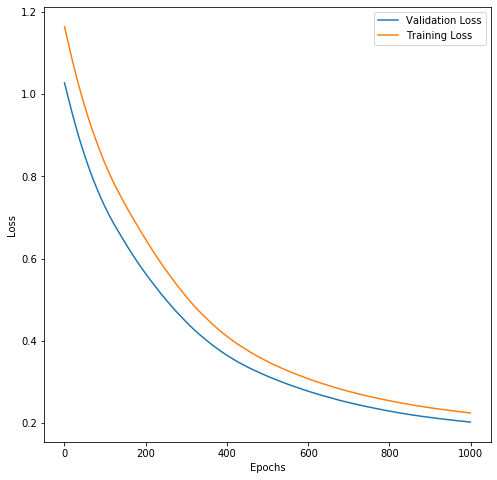

In [12]:
plot_loss(history)

# Task 7: Predictions

## 7.1: Plot Raw Predictions

Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

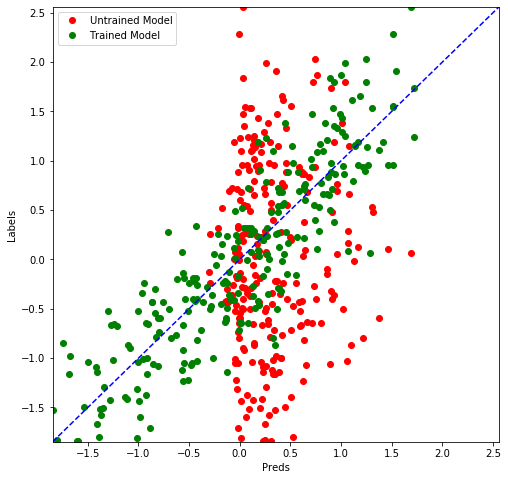

In [13]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

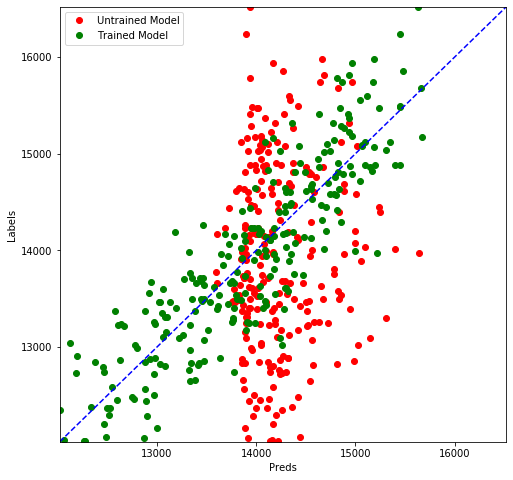

In [14]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)